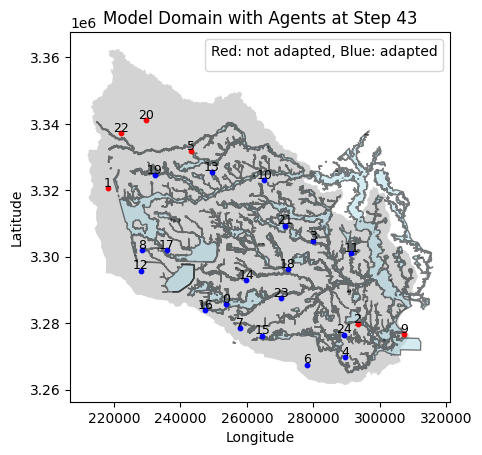

In [1]:
from model import AdaptationModel
import matplotlib.pyplot as plt
import networkx as nx

#Change seed and number_of_households however you desire. The model will spit out the same results for the same seed and number_of_households
model = AdaptationModel(seed=7, number_of_households=25, number_of_steps = 80, subsidies_package = 0, flood_map_choice="harvey", network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"

for step in range(model.number_of_steps):
    model.step()

    #The model stops when the flood has taken place. The set of rules for agents and their behaviour flowing from this set is only relevant before a flood
    if step == model.flood_step:
        model.plot_model_domain_with_agents()
        break

In [2]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data.head(60)

,total_adapted_households
0,0
1,1
2,3
3,8
4,10
5,13
6,16
7,16
8,17
9,17


In [3]:
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data

FloodDepthEstimated  FloodDamageEstimated  HouseSize  \
Step AgentID                                                         
0    0                   1.439425         348926.297068        622   
     1                   0.000000              0.000000        116   
     2                   0.000000              0.000000        310   
     3                   0.720670          71731.838024        154   
     4                   0.481480          71802.651107        175   
...                           ...                   ...        ...   
42   20                  0.000000              0.000000        243   
     21                  0.236651          34070.959810        109   
     22                  0.000000              0.000000        156   
     23                  0.720063          82890.199018        178   
     24                  0.000000              0.000000        258   

                                                   Location  FloodDepthActual  \
Step AgentID                                                                    
0    0         POINT (253640.94866921523 3285770.157505687)          0.000000   
     1         POINT (218129.44181743293 3320652.826162734)          0.000000   
     2          POINT (293302.8989053297 3279707.878376332)          0.000000   
     3          POINT (279775.7818150086 3304677.089925543)          0.000000   
     4         POINT (289685.39967328944 3269707.550771514)          0.000000   
...                                                     ...               ...   
42   20       POINT (229756.28213237075 3341245.3070814284)          0.000000   
     21         POINT (271351.1606901226 3309407.089990205)          0.152564   
     22       POINT (222206.72146049136 3337236.0067682248)          0.000000   
     23        POINT (270411.01565846795 3287661.747354995)          0.845463   
     24       POINT (289307.60453011806 3276580.0863394677)          0.000000   

              FloodDamageActual OptimalMeasure  \
Step AgentID                                     
0    0                 0.000000           None   
     1                 0.000000           None   
     2                 0.000000           None   
     3                 0.000000           None   
     4                 0.000000           None   
...                         ...            ...   
42   20                0.000000           None   
     21            27487.340633       Drains_9   
     22                0.000000           None   
     23            86821.971294       Drains_3   
     24                0.000000       Drains_2   

                                             AdaptationMeasures  GoingToAdapt  \
Step AgentID                                                                    
0    0        {'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...         False   
     1        {'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...         False   
     2        {'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...         False   
     3        {'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...         False   
     4        {'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...         False   
...                                                         ...           ...   
42   20       {'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...         False   
     21       {'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...         False   
     22       {'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...         False   
     23       {'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...         False   
     24       {'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...         False   

              IsAdapted  CostOfAdaptation   IncomeLabel  Income  Savings  \
Step AgentID                                                               
0    0            False                 0          Rich   83945      0.0   
     1            False                 0          Poor    9006      0.0   
     2            False                 

In [4]:
#Rich household that installs Sandbags after step 0
result_df_xs = agent_data.xs(key=2, level='AgentID', axis=0, drop_level=False)

# Using .loc indexer
agent = agent_data.loc[(slice(None), 2), :]

agent

,,FloodDepthEstimated,FloodDamageEstimated,HouseSize,Location,FloodDepthActual,FloodDamageActual,OptimalMeasure,AdaptationMeasures,GoingToAdapt,IsAdapted,CostOfAdaptation,IncomeLabel,Income,Savings,OwnFloodPerception,NetworkPerception
Step,AgentID,,,,,,,,,,,,,,,,
0,2,0.0,0.0,310,POINT (293302.8989053297 3279707.878376332),0.0,0.0,None,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",False,False,0,Rich,79592,0.0,2,0
1,2,0.0,0.0,310,POINT (293302.8989053297 3279707.878376332),0.0,0.0,None,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",False,False,0,Rich,79592,0.0,3,3
2,2,0.0,0.0,310,POINT (293302.8989053297 3279707.878376332),0.0,0.0,None,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",False,False,0,Rich,79592,0.0,3,3
3,2,0.0,0.0,310,POINT (293302.8989053297 3279707.878376332),0.0,0.0,None,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",False,False,0,Rich,79592,0.0,3,3
4,2,0.0,0.0,310,POINT (293302.8989053297 3279707.878376332),0.0,0.0,None,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",False,False,0,Rich,79592,0.0,3,3
5,2,0.0,0.0,310,POINT (293302.8989053297 3279707.878376332),0.0,0.0,None,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",False,False,0,Rich,79592,0.0,3,3
6,2,0.0,0.0,310,POINT (293302.8989053297 3279707.878376332),0.0,0.0,None,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",False,False,0,Rich,79592,0.0,3,3
7,2,0.0,0.0,310,POINT (293302.8989053297 3279707.878376332),0.0,0.0,None,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",False,False,0,Rich,79592,0.0,3,3
8,2,0.0,0.0,310,POINT (293302.8989053297 3279707.878376332),0.0,0.0,None,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",False,False,0,Rich,79592,0.0,3,3


In [5]:
#Poor household that installs Drains after step 11
result_df_xs = agent_data.xs(key=15, level='AgentID', axis=0, drop_level=False)

# Using .loc indexer
agent = agent_data.loc[(slice(None), 15), :]

agent

,,FloodDepthEstimated,FloodDamageEstimated,HouseSize,Location,FloodDepthActual,FloodDamageActual,OptimalMeasure,AdaptationMeasures,GoingToAdapt,IsAdapted,CostOfAdaptation,IncomeLabel,Income,Savings,OwnFloodPerception,NetworkPerception
Step,AgentID,,,,,,,,,,,,,,,,
0,15,0.250877,38473.125489,120,POINT (264612.5513591788 3276256.4283519993),0.0,0.0,None,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",False,False,0,Poor,4312,0.0,1,0
1,15,0.250877,38473.125489,120,POINT (264612.5513591788 3276256.4283519993),0.0,0.0,Drains,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",True,False,0,Poor,4312,323.4,3,3
2,15,0.250877,38473.125489,120,POINT (264612.5513591788 3276256.4283519993),0.0,0.0,Drains,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",True,False,0,Poor,4312,646.8,3,3
3,15,0.250877,38473.125489,120,POINT (264612.5513591788 3276256.4283519993),0.0,0.0,Drains,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",True,False,0,Poor,4312,970.2,3,3
4,15,0.250877,38473.125489,120,POINT (264612.5513591788 3276256.4283519993),0.0,0.0,Drains,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",True,False,0,Poor,4312,1293.6,3,3
5,15,0.250877,38473.125489,120,POINT (264612.5513591788 3276256.4283519993),0.0,0.0,Drains,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",True,False,0,Poor,4312,1617.0,3,3
6,15,0.250877,38473.125489,120,POINT (264612.5513591788 3276256.4283519993),0.0,0.0,Drains,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",True,False,0,Poor,4312,1940.4,3,3
7,15,0.250877,38473.125489,120,POINT (264612.5513591788 3276256.4283519993),0.0,0.0,Drains,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",True,False,0,Poor,4312,2263.8,3,3
8,15,0.250877,38473.125489,120,POINT (264612.5513591788 3276256.4283519993),0.0,0.0,Drains,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",True,False,0,Poor,4312,2587.2,3,3


In [6]:
#Middle-Class household that does not adapt at all
result_df_xs = agent_data.xs(key=20, level='AgentID', axis=0, drop_level=False)

# Using .loc indexer
agent = agent_data.loc[(slice(None), 20), :]

agent

,,FloodDepthEstimated,FloodDamageEstimated,HouseSize,Location,FloodDepthActual,FloodDamageActual,OptimalMeasure,AdaptationMeasures,GoingToAdapt,IsAdapted,CostOfAdaptation,IncomeLabel,Income,Savings,OwnFloodPerception,NetworkPerception
Step,AgentID,,,,,,,,,,,,,,,,
0,20,0.0,0.0,243,POINT (229756.28213237075 3341245.3070814284),0.0,0.0,None,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",False,False,0,Middle-Class,42882,0.0,3,0
1,20,0.0,0.0,243,POINT (229756.28213237075 3341245.3070814284),0.0,0.0,None,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",False,False,0,Middle-Class,42882,0.0,3,3
2,20,0.0,0.0,243,POINT (229756.28213237075 3341245.3070814284),0.0,0.0,None,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",False,False,0,Middle-Class,42882,0.0,3,3
3,20,0.0,0.0,243,POINT (229756.28213237075 3341245.3070814284),0.0,0.0,None,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",False,False,0,Middle-Class,42882,0.0,3,3
4,20,0.0,0.0,243,POINT (229756.28213237075 3341245.3070814284),0.0,0.0,None,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",False,False,0,Middle-Class,42882,0.0,3,3
5,20,0.0,0.0,243,POINT (229756.28213237075 3341245.3070814284),0.0,0.0,None,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",False,False,0,Middle-Class,42882,0.0,3,3
6,20,0.0,0.0,243,POINT (229756.28213237075 3341245.3070814284),0.0,0.0,None,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",False,False,0,Middle-Class,42882,0.0,3,3
7,20,0.0,0.0,243,POINT (229756.28213237075 3341245.3070814284),0.0,0.0,None,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",False,False,0,Middle-Class,42882,0.0,3,3
8,20,0.0,0.0,243,POINT (229756.28213237075 3341245.3070814284),0.0,0.0,None,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",False,False,0,Middle-Class,42882,0.0,3,3
